# Лабораторная работа 5. Фабарисов Дмитрий. 2 курс АД

In [69]:
import cv2
import skimage.io as sk
import matplotlib.pyplot as plt
import numpy as np
import copy as cp
import skimage.feature as sf
import skimage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
def show_pic(pic_list, name = ['picture']*100, figsize_ = (20, 20)):
    fig = figure(figsize = figsize_)
    for idx in range(len(pic_list)):
        subplot = fig.add_subplot(1, len(pic_list), idx+1)
        sk.imshow(pic_list[idx], cmap = 'gray')
        subplot.set_title(name[idx])

In [71]:
def binarise(pic, koef):
    pic_new = cp.deepcopy(pic)
    pic_new[pic_new >= koef] = 255
    pic_new[pic_new < koef] = 0
    return pic_new

In [72]:
circle1 = cv2.imread("circle1.png", 0)
circle2 = cv2.imread("circle2.png", 0)
circle3 = cv2.imread("circle3.png", 0)

line1 = cv2.imread("line1.png", 0)
line2 = cv2.imread("line2.png", 0)
line3 = cv2.imread("line3.png", 0)

lines = [line1, line2, line3]
circles = [circle1, circle2, circle3]

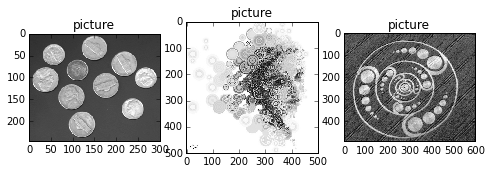

In [73]:
show_pic(circles)

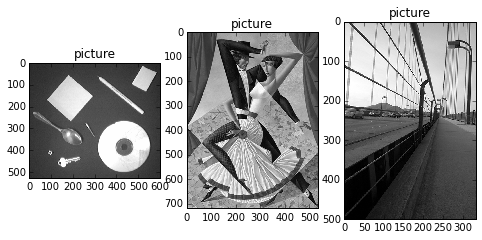

In [74]:
show_pic(lines)

## 1. Выделяем края изображения с помощью Canny

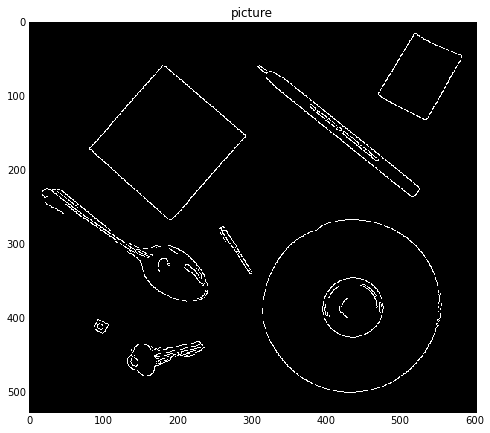

In [75]:
edge_pic = cv2.Canny(lines[0], 100, 200)
show_pic([edge_pic])

## 2. Напишем функцию houghlines для получения матрицы Хафа

In [76]:
f_steps = 600
r_steps = 600

In [77]:
def get_edge_coords(edges):
    coords = []
    for row in range(edges.shape[0]):
        for col in range(edges.shape[1]):
            if edges[row, col] == 255:
                coords.append([row, col])
    return coords

In [84]:
def houghlines(img, f_steps, r_steps, accuracy):
    edges = cv2.Canny(img, 100, 200)
    coords = get_edge_coords(edges)
    r_max = np.round(np.sqrt(img.shape[0]**2 + img.shape[1]**2))
    f_max = 2*np.pi
    haf = np.zeros((r_steps, f_steps))
    
    f_range = linspace(0, f_max, f_steps)
    r_range = linspace(0, r_max, r_steps)
    f_step = f_range[1] - f_range[0]
    r_step = r_range[1] - r_range[0]
    
    for f in range(f_steps):
        for coord in coords: 
            r_max = np.int((coord[0]*np.cos(f_range[f]) + coord[1]*np.sin(f_range[f]) + accuracy) / r_step)
            r_min = np.int((coord[0]*np.cos(f_range[f]) + coord[1]*np.sin(f_range[f]) - accuracy) / r_step)
            for r in range(r_min, r_max):
                haf[r, f] += 1
    return haf


## 3. Визуализируем результат работы

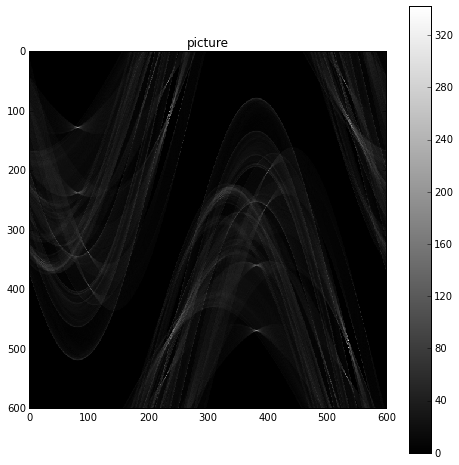

In [90]:
haf = houghlines(lines[0], f_steps, r_steps, 1)
show_pic([haf])

## 4. Преобразуем точки с максимальным откликом в линии

In [97]:
def draw_lines(image, coords):
    image_line = cp.deepcopy(image)
    for radius, theta in coords:
        s = np.sin(theta)
        c = np.cos(theta)
        x0 = s * radius
        y0 = c * radius
        x1 = int(x0 + 1000 * (-c))
        y1 = int(y0 + 1000 * (s))
        x2 = int(x0 - 1000 * (-c))
        y2 = int(y0 - 1000 * (s))
        
        cv2.line(image_line, (x1,y1), (x2,y2), (0,0,255), 2)
            
    return image_line        

In [106]:
def get_pic_with_lines(img, f_steps = f_steps, r_steps = r_steps, lines_number = 50, accuracy = 1):
    haf = houghlines(img, f_steps, r_steps, accuracy)
    largest_coords_i_j = get_largest_coords(haf,lines_number)
    
    r_max = np.round(np.sqrt(img.shape[0]**2 + img.shape[1]**2))
    f_max = 2*np.pi
    f_range = linspace(0, f_max, f_steps)
    r_range = linspace(0, r_max, r_steps)
    f_step = f_range[1] - f_range[0]
    r_step = r_range[1] - r_range[0]
    
    max_response = sorted(haf.flatten(), reverse=True)[:lines_number]
    lines_phases = [[r * r_step, f * f_step] for r in range(r_steps) for f in range(f_steps) if haf[r][f] in max_response]

    image_line = draw_lines(img, lines_phases)
    return image_line

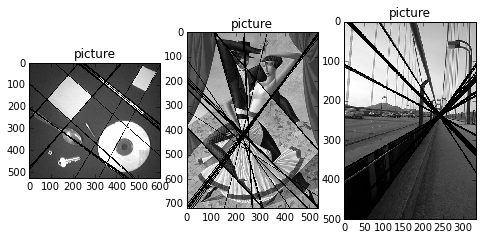

In [107]:
image_lines = map(get_pic_with_lines, lines)
show_pic(image_lines)

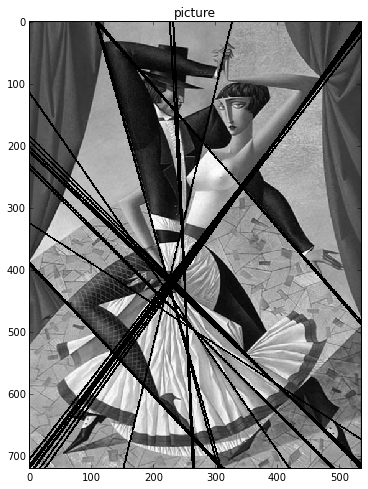

In [103]:
image_line = get_pic_with_lines(lines[1], f_steps, r_steps, 50, 1)
show_pic([image_line])

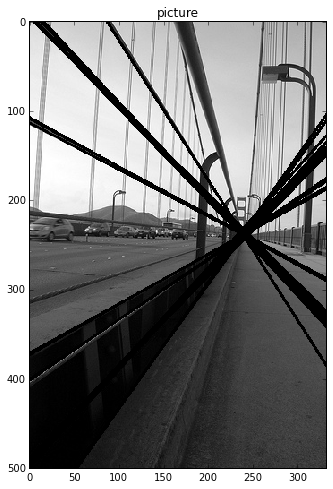

In [104]:
image_line = get_pic_with_lines(lines[2], f_steps, r_steps, 50, 1)
show_pic([image_line])